## Titanic Data

In [42]:
import pandas as pd
import numpy as np


df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [43]:
#encoding cleaning train-test data

sexMap = {'female': 0, 'male': 1}
df_train['Sex'] = df_train['Sex'].map(sexMap)
df_test['Sex'] = df_test['Sex'].map(sexMap)


In [44]:
embarkedMap = {'C': 0, 'Q': 1, 'S': 2}
df_train['Embarked'] = df_train['Embarked'].map(embarkedMap)
df_test['Embarked'] = df_test['Embarked'].map(embarkedMap)

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0


In [46]:
col_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']

df_train = df_train.drop(columns=col_drop)
df_test = df_test.drop(columns=col_drop)


In [47]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,2.0
3,1,1,0,35.0,1,0,53.1000,2.0
4,0,3,1,35.0,0,0,8.0500,2.0


In [48]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [49]:
#imputing the fir transform train data and transform test data
from sklearn.impute import SimpleImputer

#creating imputers
imputerMean = SimpleImputer(strategy='mean', missing_values=np.nan)
imputerEmbarked = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputerFare = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

In [50]:
#For checking the missing value in test data
df_test['Fare'].unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [51]:
#Fit transforming null Age fetures with imputer
df_train['Age'] = imputerMean.fit_transform(df_train[['Age']])
df_test['Age'] = imputerMean.transform(df_test[['Age']])

In [52]:
df_train['Embarked'] = imputerEmbarked.fit_transform(df_train[['Embarked']])
df_test['Embarked'] = imputerEmbarked.transform(df_test[['Embarked']])

In [53]:
print(df_train.isna().sum())
print(df_test.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64


In [54]:
#Only the fare in test data left, there is no empty cells in train data but we will do it regardless.
df_train['Fare'] = imputerFare.fit_transform(df_train[['Fare']])
df_test['Fare'] = imputerFare.transform(df_test[['Fare']])

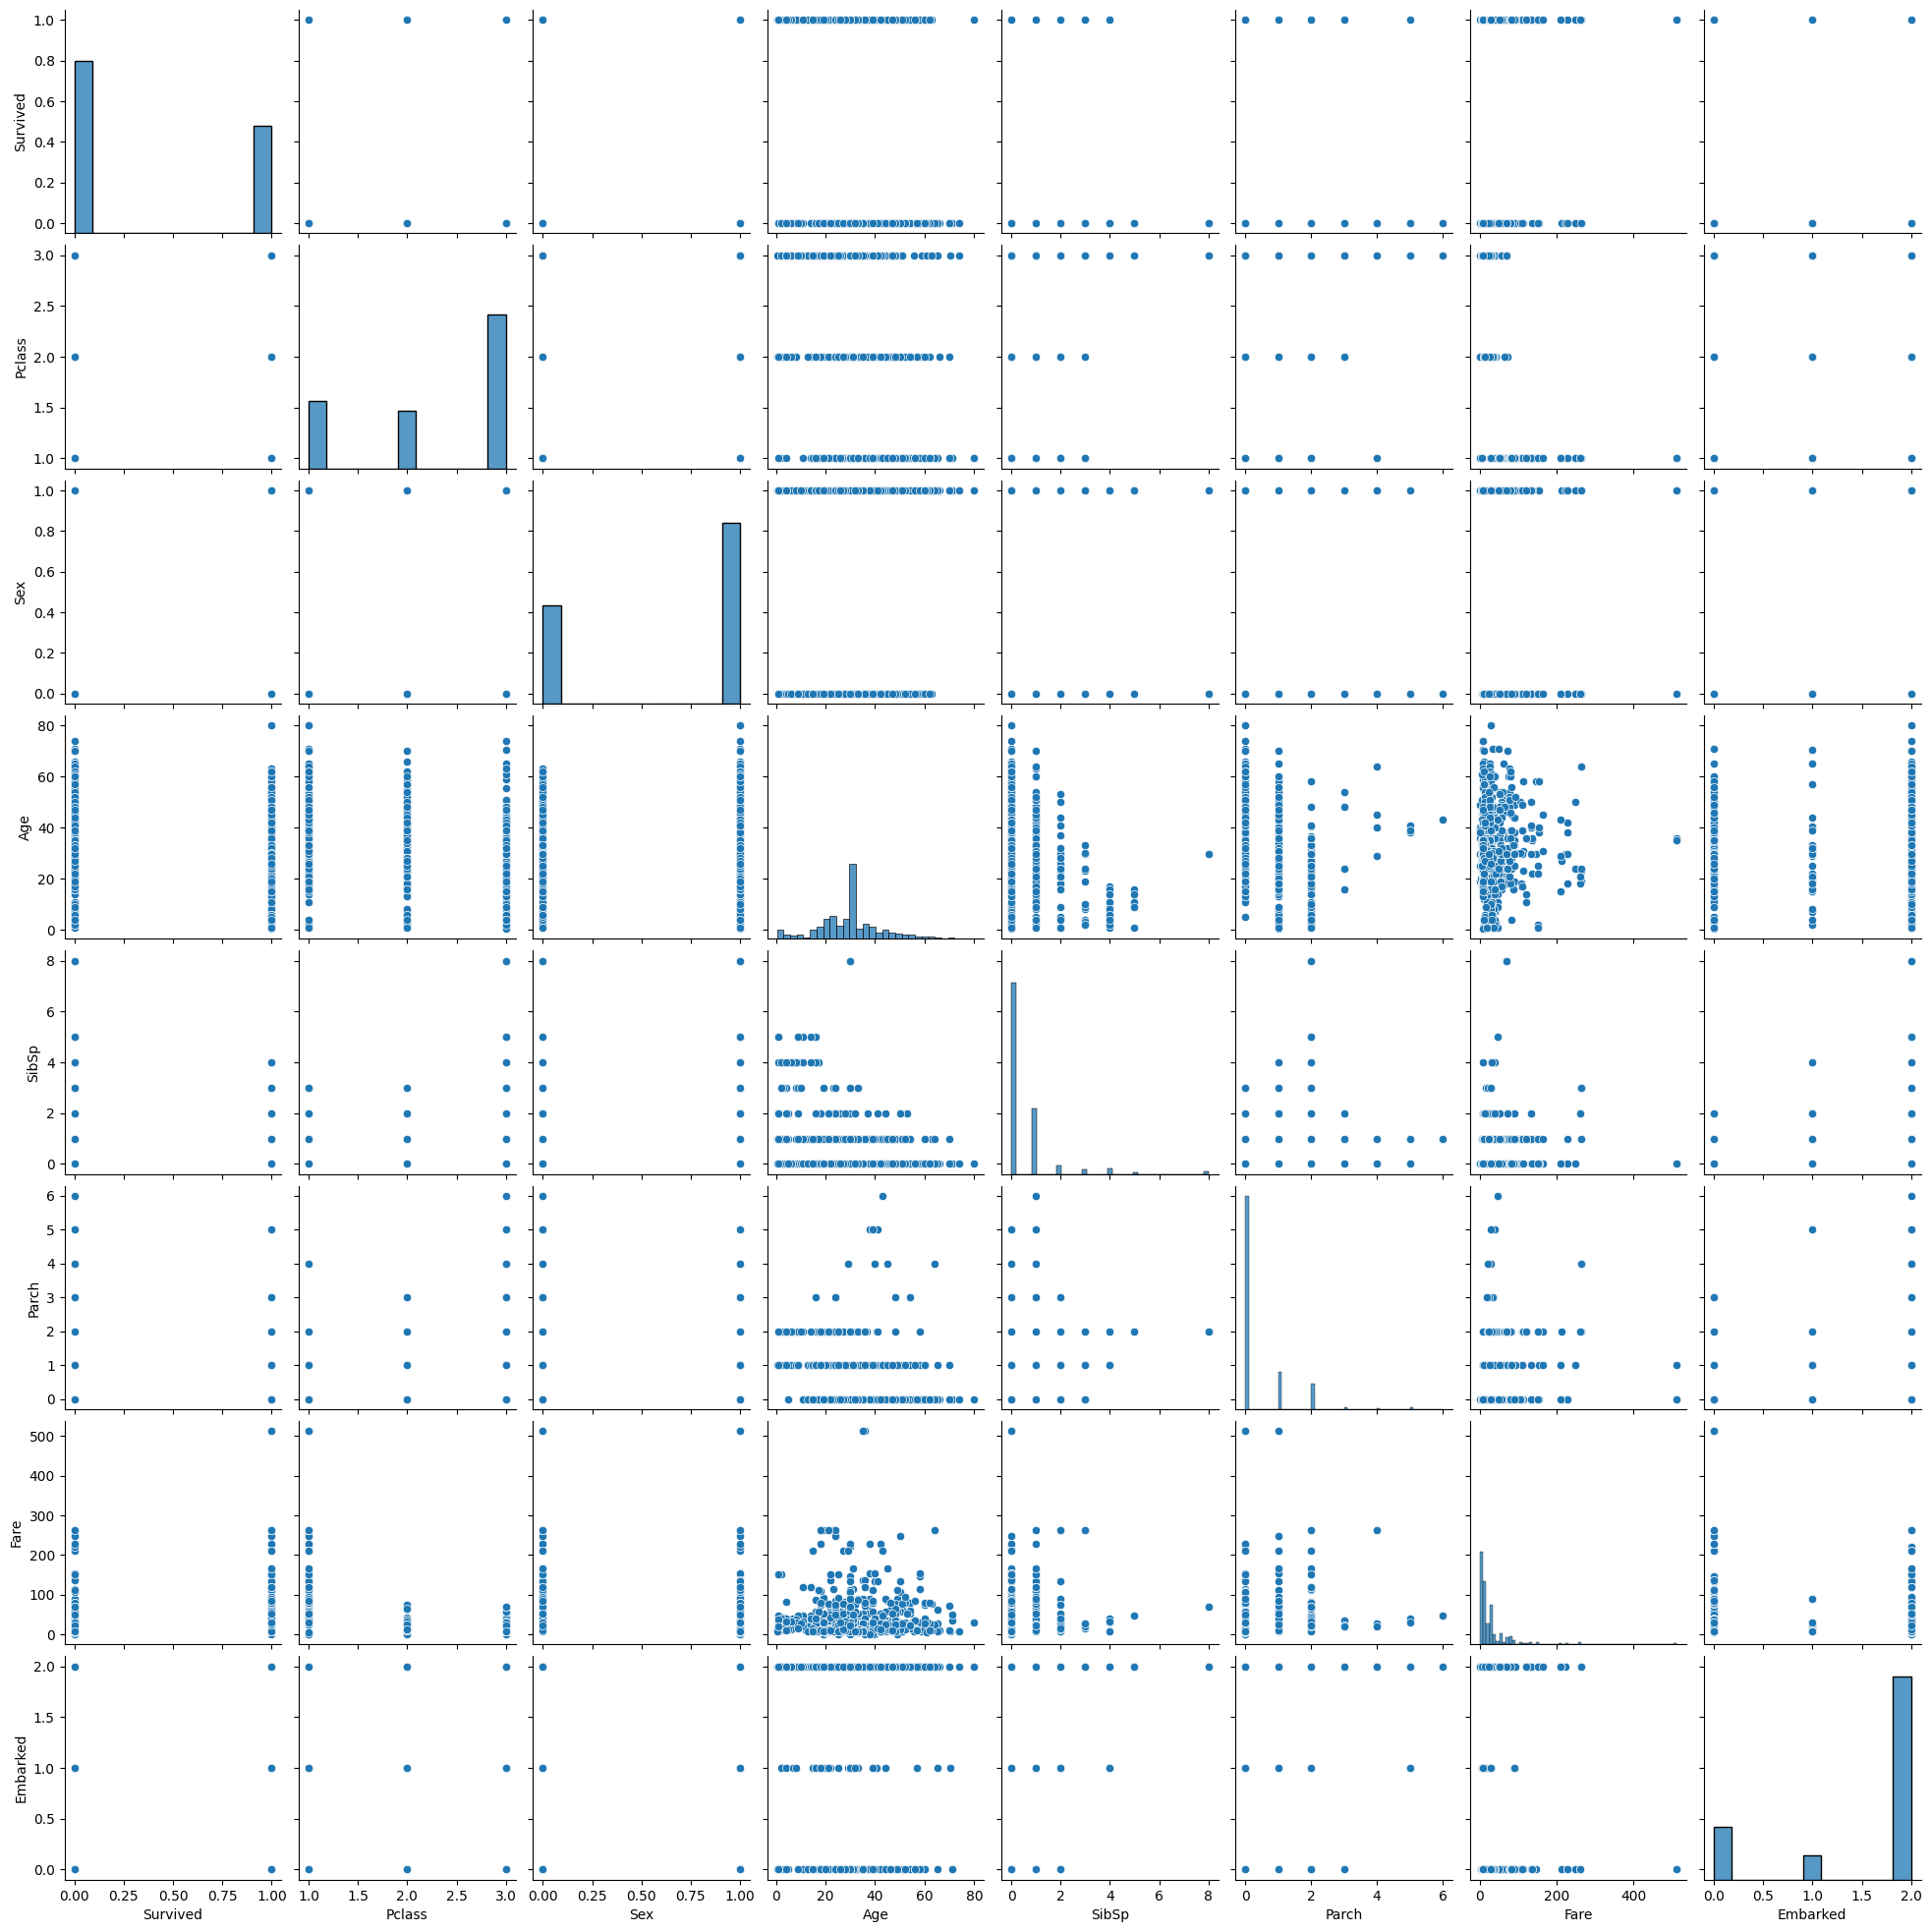

In [55]:
#visualizing the relationship
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_train)

<Axes: >

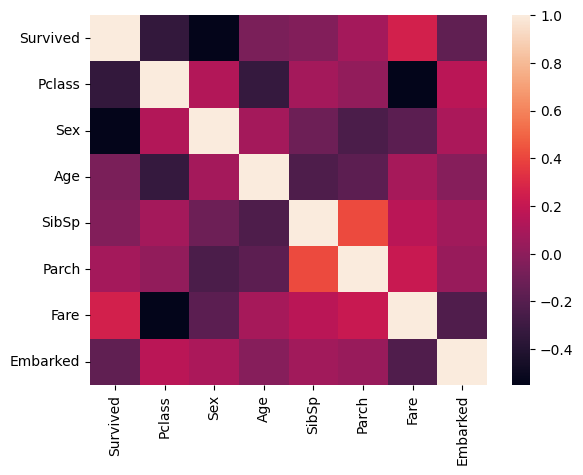

In [56]:
sns.heatmap(df_train.corr())

In [57]:
#feature selection before splitting - for train data

X = df_train.drop(columns=['Survived'])
y = df_train['Survived']

In [58]:
#splitting the train data into 80% train - 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42, n_estimators=10000)

rfc.fit(X_train, y_train)


,n_estimators,10000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

mean_squared_error(y_test, y_pred)

0.18994413407821228

In [61]:
r2_score(y_test, y_pred)

0.19815546772068515

In [62]:
accuracy_score(y_test, y_pred)

0.8100558659217877

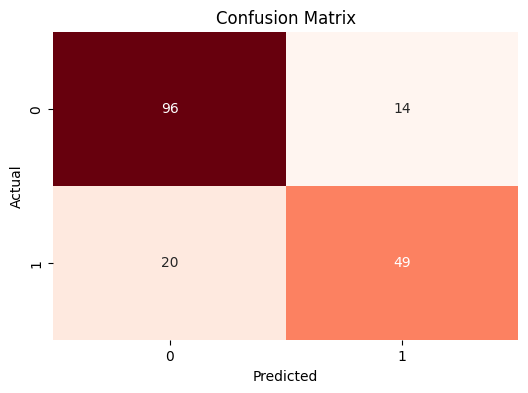

In [63]:
#visualizing the confusion matrix
from sklearn.metrics import confusion_matrix

confMat = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,4))
sns.heatmap(confMat, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [64]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [2000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)



# Evaluating the best estimator on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy of the best model:", test_accuracy)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 2000}
Best cross-validated accuracy: 0.8273613710233428
Test set accuracy of the best model: 0.8156424581005587


In [65]:
#making the prediction on the test.csv with the tuned model
final_prediction = best_model.predict(df_test)

In [66]:
# Reading the file for submission
original_test_data = pd.read_csv('test.csv')

#aggregating the passenger number with the prediction
submission_df = pd.DataFrame({
    "PassengerId": original_test_data["PassengerId"],
    "Survived": final_prediction
})
#saving as a file
submission_df.to_csv('titanic_submission.csv', index=False)